In [1]:
%pip install -q matplotlib
%pip install -q pandas
%pip install -q scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [198]:
dataset_csv_fp = 'my_dataset.csv'

save_dataset_fp = 'my_dataset2.csv'

c_soil_moisture = 'soil_moisture'
c_air_tempe = 'air_temperature'
c_air_humidity = 'air_humidity'
c_hour = 'hour'
c_state = 'state'

In [200]:
import pandas as pd

df = pd.read_csv(dataset_csv_fp)

# df['watering'] = df['watering'].astype('category')
# df['watering'] = df['watering'].cat.codes

df = df[df[c_air_tempe].notna()]
df = df[df[c_air_humidity].notna()]
df

,soil_moisture,air_temperature,air_humidity,hour,state
0,54,19.52,55.04,4,0
1,12,19.49,55.17,8,1
2,34,19.47,55.30,12,1
3,7,19.54,54.20,16,1
4,50,19.61,53.09,20,0
...,...,...,...,...,...
95,11,19.60,22.42,0,1
96,63,19.89,22.11,4,0
97,88,20.28,22.04,8,0
98,79,20.68,21.97,12,0


In [201]:
X = df.drop(columns=[c_state])

X

,soil_moisture,air_temperature,air_humidity,hour
0,54,19.52,55.04,4
1,12,19.49,55.17,8
2,34,19.47,55.30,12
3,7,19.54,54.20,16
4,50,19.61,53.09,20
...,...,...,...,...
95,11,19.60,22.42,0
96,63,19.89,22.11,4
97,88,20.28,22.04,8
98,79,20.68,21.97,12


In [202]:
y = df[c_state]

y

0     0
1     1
2     1
3     1
4     0
     ..
95    1
96    0
97    0
98    0
99    1
Name: state, Length: 100, dtype: int64

In [203]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [204]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [205]:
lr.fit(X_train, y_train)

LinearRegression()

In [206]:
c = lr.intercept_
c

1.1641090797566855

In [207]:
m = lr.coef_
m

array([-0.0171385 ,  0.0128183 , -0.00525972,  0.00242084])

In [208]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([ 0.30813118, -0.0240537 ,  0.16535582,  0.05713697,  0.60525207,
        0.99929455,  0.08757895,  1.08016772,  0.75069797,  0.33422182,
        0.93746405,  1.10222471,  0.33898022,  0.87623311,  0.3277296 ,
        0.58152161,  0.10206104,  0.52660052,  1.2766943 ,  1.07708012,
        0.73778265,  1.10797066,  0.20903204,  0.94848   ,  0.66935052,
        1.08472953, -0.31012739,  0.11549381,  1.26496352,  0.40461565,
        0.15744435,  0.68574179,  1.04616065,  0.79339155,  0.90178013,
        1.12004825,  0.03180342,  1.01946876,  0.38399851,  1.01560519,
        0.93020258,  0.86636051,  0.39878906, -0.18068104, -0.01125568,
        0.94310924,  0.6072275 , -0.02324779,  1.08324729,  0.98134558,
        1.14538605,  0.58101397,  0.5403928 ,  0.07486799,  0.27548245,
        1.1386475 ,  0.66152265,  0.54659073,  0.13913003,  1.07506313,
        0.98846226,  0.77671636,  1.27833796,  1.08563945,  0.89504379,
        0.23273075,  0.53509912, -0.07293602, -0.10634257,  0.71

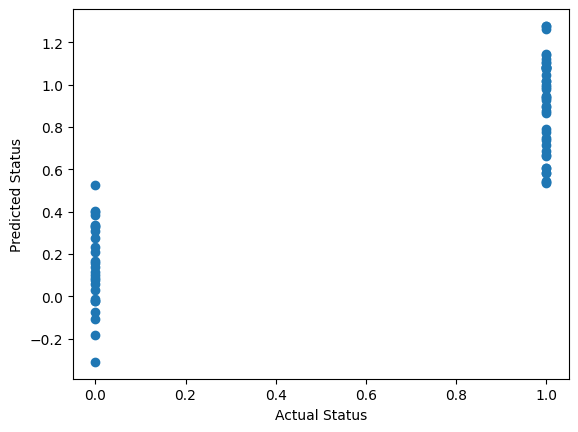

In [209]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Status')
plt.ylabel('Predicted Status')
plt.show()

In [210]:
from sklearn.metrics import r2_score

r2_score(y_train, y_pred_train)

0.7622930247441206

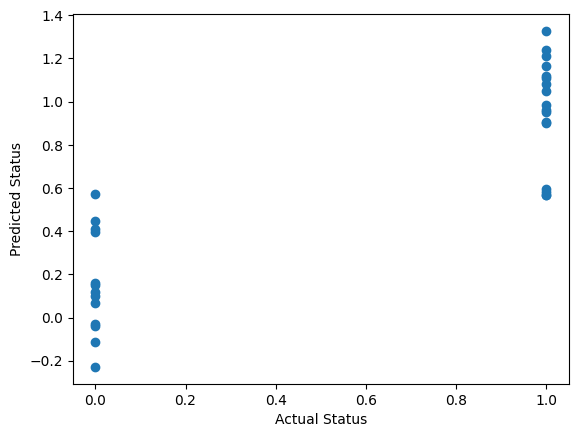

In [211]:
y_pred_test = lr.predict(X_test)
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Status')
plt.ylabel('Predicted Status')
plt.show()

In [212]:
r2_score(y_test, y_pred_test)

0.7281796225975119

In [228]:
def predict(soil_moisture: int, humidity: int, temperature: int, hour_inday: int) -> float:
    data = [[soil_moisture, humidity, temperature, hour_inday]]
    input_data = pd.DataFrame(data, 
        columns=[
            c_soil_moisture, 
            c_air_tempe, 
            c_air_humidity, 
            c_hour
        ]
    )
    return lr.predict(input_data)
    

In [231]:
p = predict(40, 20.5, 30.7, 4)

print(f"start watering: {p[0]}")

start watering: 0.5895544355895125
